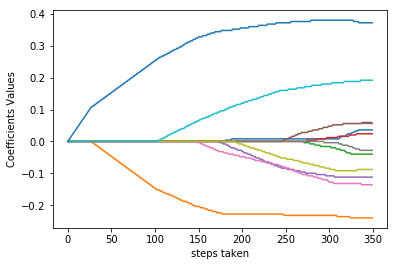

In [8]:
import numpy as np
from urllib.request import urlopen
from math import sqrt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

data = urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        line = line.decode('utf-8')
        names = line.strip().split(";")
        firstLine = False
    else:
        
        line = line.decode('utf-8')
        row = line.strip().split(";")
        labels.append(float(row[-1]))
        row.pop()
        floatrow = [float(num) for num in row]
        xList.append(floatrow)
        
# calculate mean and variance in each column
nrows = len(xList)
ncols = len(xList[0])

xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] -mean) for j in range(nrows)]
    sumsq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumsq/nrows)
    xSD.append(stdDev)
# normalize the dataset
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)
    
# normalized the labels
meanLabel = sum(labels)/(nrows)
sdLabel = sqrt(sum([(labels[i] - meanLabel)*(labels[i]-meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

# initialize vector of coefficients beta and matrix of betas at each step
beta = [0.0]* ncols
betaMat = []
betaMat.append(list(beta))
nsteps = 350
stepSize = 0.004

for i in range(nsteps):
    residuals = [0.0]* nrows
    for j in range(nrows):
        labelsHat = sum([xNormalized[j][k]*beta[k] for k in range(ncols)])
        residuals[j] = labelNormalized[j] - labelsHat
        
    # correlation between feature columns
    corr = [0.0]*ncols
    for j in range(ncols):
        corr[j] = sum([xNormalized[k][j] * residuals[k] for k in range(nrows)])/nrows
        
    iStar = 0
    corrStar = corr[0]
    for j in range(1,(ncols)):
        if abs(corrStar) < abs(corr[j]):
            iStar = j
            corrStar = corr[j]
    beta[iStar] += stepSize * corrStar /abs(corrStar)
    betaMat.append(list(beta))

    
for i in range(ncols):
    coefCurve = [betaMat[k][i] for k in range(nsteps)]
    xaxis = range(nsteps)
    plt.plot(xaxis,coefCurve)



plt.xlabel("steps taken")
plt.ylabel("Coefficients Values")
plt.show()